# David Ogaus, Jonathan Caspar, Tommy Côté et Xiuli Zhang 
## IFT 3700
## 6 Novembre 2018
## Travail 1

## Mesure de similarité
ON va mettre ici notre description de la mesure de similarité

## Importation du jeu de données MNIST

In [70]:
import csv

#On ouvre le fichier 'mnist_train.csv'
data = open('mnist_train.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

#On transforme les données en integers
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 60 000 x 1 qui contient les étiquettes
y_train = []
for row in data_points:
    y_train.append(row[0])

#Matrice 60 000 x 784 qui contient les données
x_train = []
for row in data_points:
    x_train.append(row[1:785])
    
#On ouvre le fichier 'mnist_test.csv'
data = open('mnist_test.csv')
csv_file = csv.reader(data)
data_points = []
for row in csv_file:
    data_points.append(row)
data.close()

#On enlève la première ligne, soit les "headers" de nos colones
data_points.pop(0)

#Convertir en int
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

#Vecteur 10 000 x 1 qui contient les étiquettes
y_test = []
for row in data_points:
    y_test.append(row[0])

#Matrice 10 000 x 784 qui contient les données
x_test = []
for row in data_points:
    x_test.append(row[1:785])

## Algorithme k-moyenne

## Algorithme partition binaire

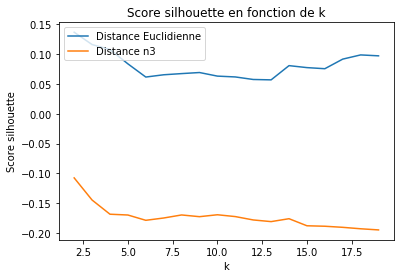

In [72]:
%matplotlib inline
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances

#Ensemble de donné réduit pour faire des tests
x__test= x_test[0:100]

# La métrique euclidienne
def metric_euclid(x, y):
    sum=0
    for i in range(len(x)):
        sum += (x[i]-y[i])**2
    return math.sqrt(sum)

# La métrique #1 dans le fichier word
def metric_n1(x, y):
    sum_x=0
    sum_y=0
    for i in range(len(x)):
        sum_x += x[i]
        sum_y += y[i]
    return abs(sum_x - sum_y)

# La métrique #3 dans le fichier word
def metric_n3(x, y):
    sum=0
    for i in range(len(x)):
        if ((x[i]==0 and y[i]==0) or (x[i]!=0 and y[i]!=0)):
            sum+=1
    return sum/784

# Définie une matrice des distances avec la métrique de notre choix
m = pairwise_distances(x__test, metric=metric_n3)

scores = []
scores_t=[]
k_range = range(2,20)
for k in k_range:
    y_pred = AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=k).fit_predict(x__test)
    scores.append(silhouette_score(x__test, y_pred))
    y_pred_t = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=k).fit_predict(m)
    scores_t.append(silhouette_score(x__test, y_pred_t))
plt.plot(k_range, scores, label='Distance Euclidienne')
plt.plot(k_range, scores_t, label='Distance n3')
plt.legend(loc='upper left')
plt.xlabel('k')
plt.ylabel('Score silhouette')
plt.title('Score silhouette en fonction de k')

## Algorithme PCoA

## Algorithme Isomap

## Algorithme KNN